<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [2]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 99.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 67.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 75.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 86.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 136.6 MB/s eta 0:00:00


#### Step 1: Load the dataset


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




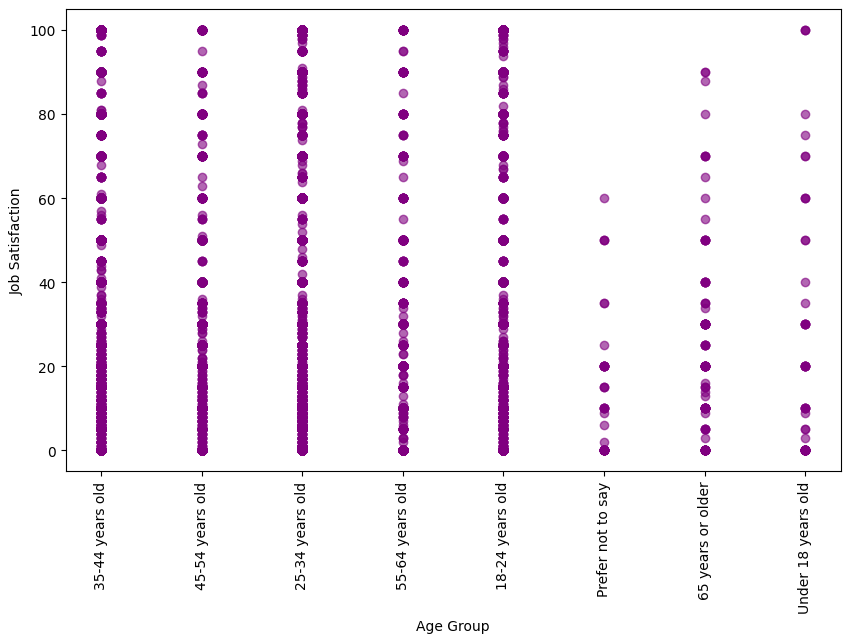

In [5]:
df = df.dropna(subset=['Age', 'JobSatPoints_6'])

plt.figure(figsize=(10,6)) 
plt.scatter(df['Age'], df['JobSatPoints_6'], alpha=0.6, color='purple')
plt.xlabel('Age Group')
plt.ylabel('Job Satisfaction')
plt.xticks(rotation=90) 
plt.show() 


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


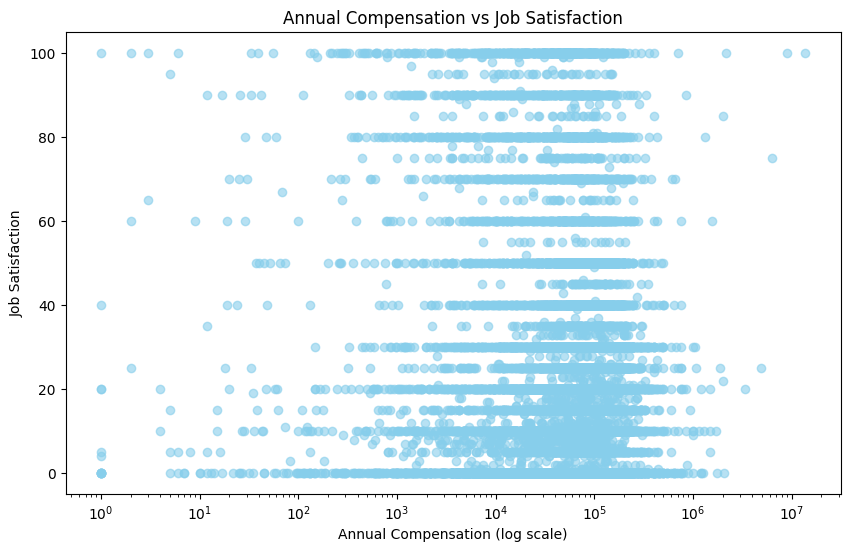

In [6]:
df_valid = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

plt.figure(figsize=(10,6))
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], color='skyblue', alpha=0.6)
plt.xscale('log')  
plt.xlabel('Annual Compensation (log scale)')
plt.ylabel('Job Satisfaction')
plt.title('Annual Compensation vs Job Satisfaction')
plt.show()

### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


/tmp/ipykernel_299/3505691347.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_valid['AgeNum'] = df_valid['Age'].map({


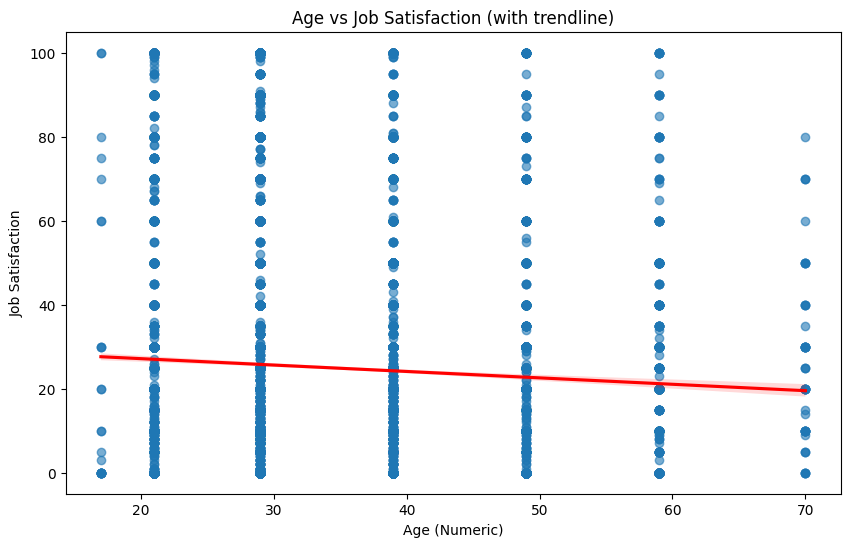

In [7]:
import seaborn as sns

#Same code as before + trendline

df_valid = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])
#Age mappinh 
df_valid['AgeNum'] = df_valid['Age'].map({
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
})
#plot 
plt.figure(figsize=(10,6))
sns.regplot(x='AgeNum', y='JobSatPoints_6', data=df_valid, 
            scatter_kws={'alpha':0.6}, line_kws={'color':'red'})
plt.xlabel('Age (Numeric)')
plt.ylabel('Job Satisfaction')
plt.title('Age vs Job Satisfaction (with trendline)')
plt.show()

#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


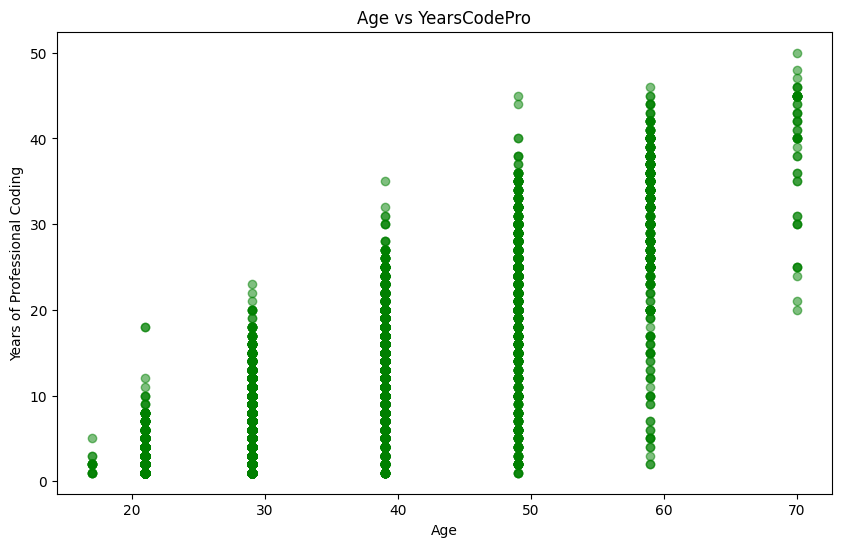

In [44]:
df_valid = df.dropna(subset=['Age', 'YearsCodePro']).copy()

# YearsCodePro to Numeric
df_valid['YearsCodePro'] = pd.to_numeric(df_valid['YearsCodePro'], errors='coerce')

# age mapping
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_valid['AgeNum'] = df_valid['Age'].map(age_map)

# Scatter
plt.figure(figsize=(10,6))
plt.scatter(df_valid['AgeNum'], df_valid['YearsCodePro'], alpha=0.5, color='green')
plt.xlabel('Age')
plt.ylabel('Years of Professional Coding')
plt.title('Age vs YearsCodePro')
plt.show()
plt.show()

### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


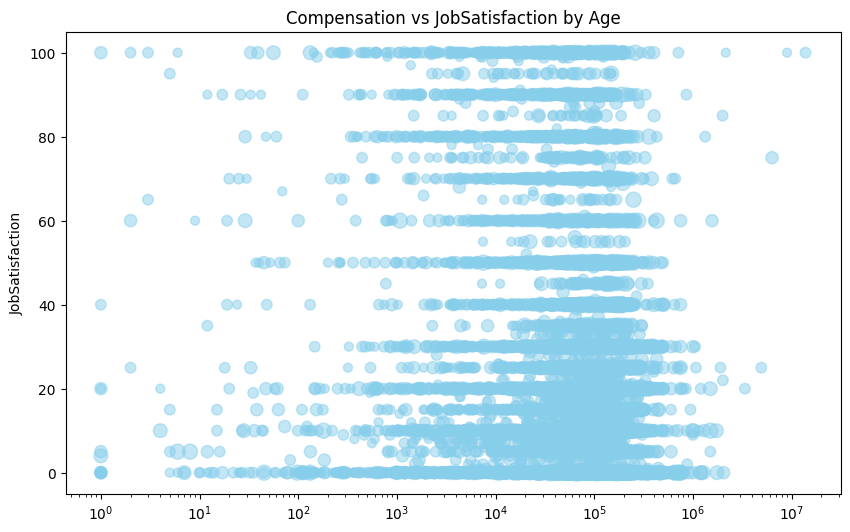

In [9]:
#drop NaNs
df_valid = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age']).copy()
# age mapping
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_valid['AgeNum'] = df_valid['Age'].map(age_map)

#Bubble plot
plt.figure(figsize=(10,6)) 
plt.scatter(x=df_valid['ConvertedCompYearly'], y=df_valid['JobSatPoints_6'],
            s=df_valid['AgeNum'] * 2, alpha=0.5, color='skyblue')
plt.xscale('log') 
plt.title('Compensation vs JobSatisfaction by Age')
plt.ylabel('JobSatisfaction') 
plt.show()

#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


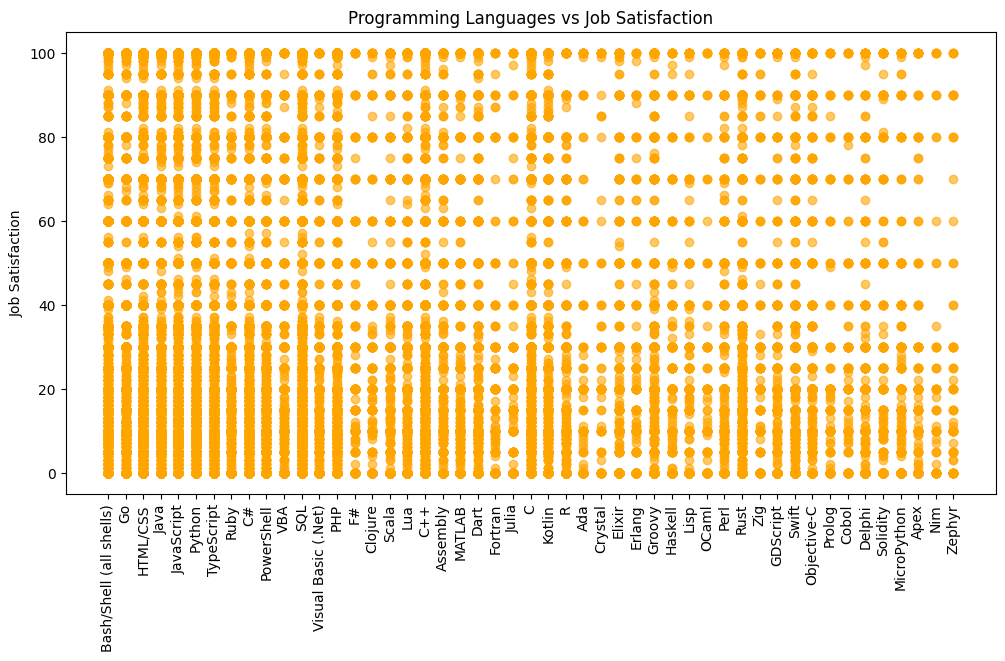

In [10]:
df_valid = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

# Dividing languages into a list
df_valid['LanguageList'] = df_valid['LanguageHaveWorkedWith'].str.split(';')

#Explode language
df_exploded = df_valid.explode('LanguageList')

# Scatter
plt.figure(figsize=(12,6))
plt.scatter(
    x=df_exploded['LanguageList'], 
    y=df_exploded['JobSatPoints_6'], 
    alpha=0.6, color='orange'
)
plt.xticks(rotation=90)
plt.ylabel('Job Satisfaction')
plt.title('Programming Languages vs Job Satisfaction')
plt.show()

### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


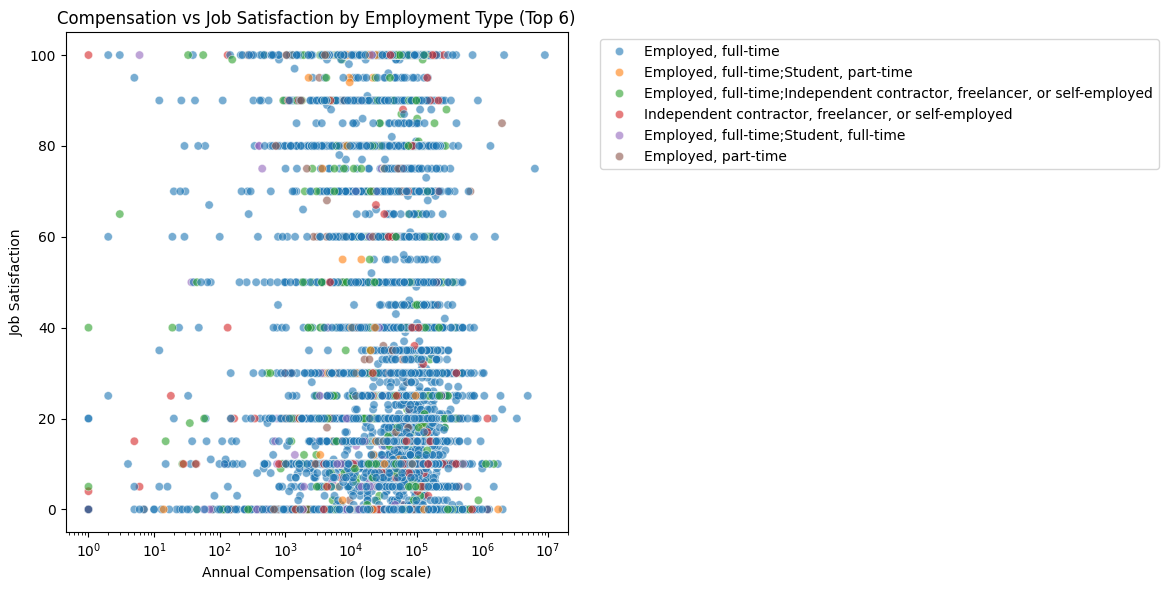

In [16]:
df_valid = df.dropna(subset=['Employment', 'JobSatPoints_6', 'ConvertedCompYearly']).copy()

# Filter most frequent categories 
top_employment = df_valid['Employment'].value_counts().nlargest(6).index
df_filtered = df_valid[df_valid['Employment'].isin(top_employment)]

plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_filtered,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',
    alpha=0.6
)
plt.xscale('log')
plt.xlabel('Annual Compensation (log scale)')
plt.ylabel('Job Satisfaction')
plt.title('Compensation vs Job Satisfaction by Employment Type (Top 6)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


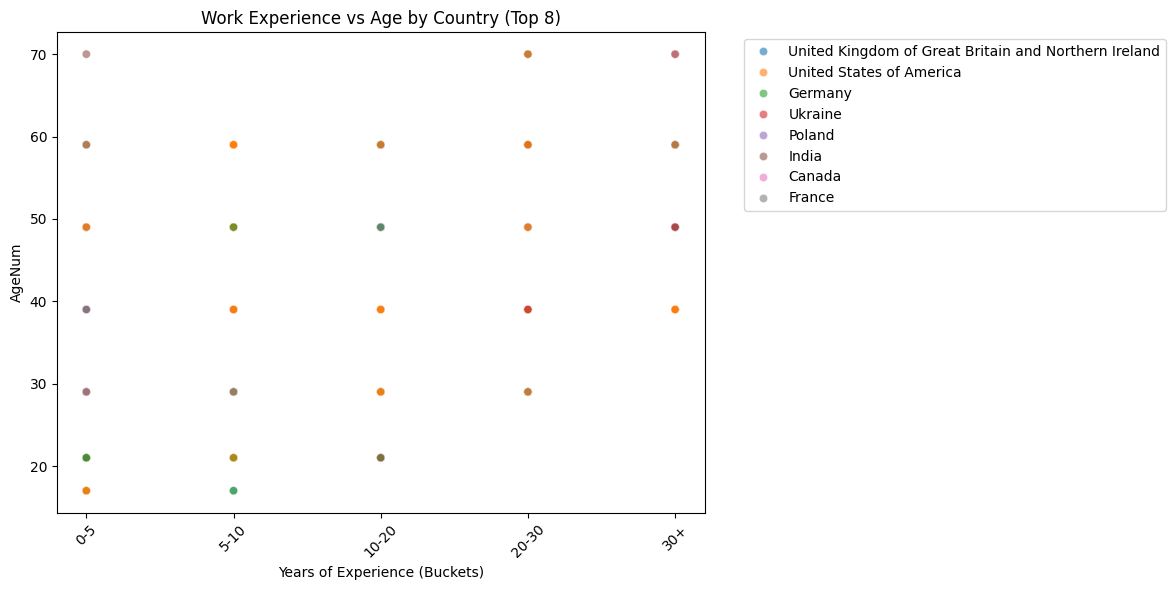

In [29]:
df_valid = df.dropna(subset=['Country', 'Age', 'YearsCodePro']).copy()

# Age mapping
age_map = {
    'Under 18 years old': 17,
    '18-24 years old': 21,
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 70
}
df_valid['AgeNum'] = df_valid['Age'].map(age_map)

# Top 8 countries
top_countries = df_valid['Country'].value_counts().nlargest(8).index
df_filtered = df_valid[df_valid['Country'].isin(top_countries)].copy()

#YearCodePro Bucket
bins = [0, 5, 10, 20, 30, 50]
labels = ['0-5', '5-10', '10-20', '20-30', '30+']
df_filtered['YearsCodeBucket'] = pd.cut(
    pd.to_numeric(df_filtered['YearsCodePro'], errors='coerce'),
    bins=bins,
    labels=labels,
    right=False
)

#Drop Nans from YearsCodeBucket 
df_filtered = df_filtered.dropna(subset=['YearsCodeBucket'])

#Scatterplot 
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=df_filtered,
    x='YearsCodeBucket',
    y='AgeNum',
    hue='Country',
    alpha=0.6
)

plt.ylabel('AgeNum')
plt.xlabel('Years of Experience (Buckets)')
plt.title('Work Experience vs Age by Country (Top 8)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()



### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
